In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part A: Data Preparation

## 1. Load Dataset

In [38]:
df_sentiment = pd.read_csv('fear_greed_index.csv')
df_trades = pd.read_csv('historical_data.csv')

## 2. Preview Data

In [39]:
df_sentiment.head(10)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [40]:
print("Sentiment Data Info:")
print(df_sentiment.info())

Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [41]:
print("\nTrader Data Info:")
print(df_trades.info())


Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes

In [42]:
df_trades.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [43]:
print(f"df_sentiment has {df_sentiment.shape[0]} rows and {df_sentiment.shape[1]} columns.")
print(f"df_trades has {df_trades.shape[0]} rows and {df_trades.shape[1]} columns.")

df_sentiment has 2644 rows and 4 columns.
df_trades has 211224 rows and 16 columns.


In [44]:
print("\nNull values in df_sentiment:")
print(df_sentiment.isnull().sum())


Null values in df_sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [45]:
print("\nNull values in df_trades:")
print(df_trades.isnull().sum())


Null values in df_trades:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [46]:
print(df_trades[df_trades['Timestamp'].isnull()])

Empty DataFrame
Columns: [Account, Coin, Execution Price, Size Tokens, Size USD, Side, Timestamp IST, Start Position, Direction, Closed PnL, Transaction Hash, Order ID, Crossed, Fee, Trade ID, Timestamp]
Index: []


In [47]:
df_trades.dropna(subset=['Timestamp'],inplace=True)
print(df_trades.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [48]:
print(f"Number of duplicate rows in df_sentiment: {df_sentiment.duplicated().sum()}")
print(f"Number of duplicate rows in df_trades: {df_trades.duplicated().sum()}")

Number of duplicate rows in df_sentiment: 0
Number of duplicate rows in df_trades: 0


In [49]:
print(f"df_sentiment has {df_sentiment.shape[0]} rows and {df_sentiment.shape[1]} columns.")
print(f"df_trades has {df_trades.shape[0]} rows and {df_trades.shape[1]} columns.")

df_sentiment has 2644 rows and 4 columns.
df_trades has 211224 rows and 16 columns.


## 3. Data Formatting

In [50]:
# Convert 'date' column in df_sentiment to datetime
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

# Convert 'Timestamp IST' column in df_trades to datetime
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# Create a 'daily_date' column for merging
df_sentiment['daily_date'] = df_sentiment['date'].dt.date
df_trades['daily_date'] = df_trades['Timestamp IST'].dt.date

# Merge the dataframes on the daily_date column
df_merged = pd.merge(df_trades, df_sentiment, on='daily_date', how='left')

In [51]:
print("Merged DataFrame Info:")
print(df_merged.info())

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  f

In [52]:
print(f"df_merged has {df_merged.shape[0]} rows and {df_merged.shape[1]} columns.")

df_merged has 211224 rows and 21 columns.


In [53]:
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,daily_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


## 4. Creating the key metrics to analyze

In [54]:
# 1. Standardize Sentiment Labels
# We map 'Extreme Fear' -> 'Fear' and 'Extreme Greed' -> 'Greed'
def clean_sentiment(x):
    if pd.isna(x): return 'Neutral'
    x = str(x).lower()
    if 'fear' in x: return 'Fear'
    if 'greed' in x: return 'Greed'
    return 'Neutral'

In [55]:
# 2. Long/Short Ratio per Day
def normalize_side(side):
    side = str(side).upper()
    if 'BUY' in side or 'LONG' in side:
        return 'Long'
    elif 'SELL' in side or 'SHORT' in side:
        return 'Short'
    return 'Other'

In [56]:
def is_long_position(side):
    s = str(side).upper()
    return 1 if ('BUY' in s or 'LONG' in s) else 0

In [57]:
df_merged['Sentiment_Group'] = df_merged['classification'].apply(clean_sentiment)
df_merged['is_win'] = df_merged['Closed PnL'] > 0
df_merged['is_loss'] = df_merged['Closed PnL'] < 0
df_merged['Position Type'] = df_merged['Side'].apply(normalize_side)
df_merged['is_long'] = df_merged['Side'].apply(is_long_position)

In [58]:
# 3. Daily PnL per Trader (Account)
# Aggregating PnL by Day and Account
daily_pnl = df_merged.groupby(['daily_date', 'Account', 'Sentiment_Group'])['Closed PnL'].sum().reset_index()
print("--- Daily PnL Snapshot ---")
daily_pnl.head()

--- Daily PnL Snapshot ---


,daily_date,Account,Sentiment_Group,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Greed,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-205.434737
3,2023-12-15,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,-24.632034
4,2023-12-16,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,0.000000


In [59]:
# 4. Trader Metrics (per trader + sentiment)
trader_metrics = df_merged.groupby(['Account', 'Sentiment_Group']).agg({
    'is_win': 'mean',
    'Size USD': 'mean',
    'Closed PnL': 'sum',
    'Account': 'count'
}).rename(columns={'is_win': 'Win Rate', 'Size USD': 'Avg Size USD', 'Account': 'Total Trades'})
trader_metrics['Win Rate'] *= 100
trader_metrics.head()

Win Rate  \
Account                                    Sentiment_Group              
0x083384f897ee0f19899168e3b1bec365f52a9012 Fear             51.810437   
                                           Greed            10.204082   
                                           Neutral          58.194774   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd Fear             46.740688   
                                           Greed            44.002123   

                                                            Avg Size USD  \
Account                                    Sentiment_Group                 
0x083384f897ee0f19899168e3b1bec365f52a9012 Fear             16916.688365   
                                           Greed            13234.263667   
                                           Neutral          23336.999311   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd Fear              1053.107160   
                                           Greed             2125.939583   

                                                              Closed PnL  \
Account                                    Sentiment_Group                 
0x083384f897ee0f19899168e3b1bec365f52a9012 Fear             1.238143e+06   
                                           Greed            2.364369e+05   
                                           Neutral          1.256501e+05   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd Fear            -5.893890e+03   
                                           Greed            6.571229e+04   

                                                            Total Trades  
Account                                    Sentiment_Group                
0x083384f897ee0f19899168e3b1bec365f52a9012 Fear                     1878  
                                           Greed                    1519  
                                           Neutral                   421  
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd Fear                     2792  
                                           Greed                    3768

In [60]:
# 5. Daily Volume (per sentiment)
daily_volume = df_merged.groupby(['daily_date', 'Sentiment_Group']).size().reset_index(name='Trade Count')
daily_volume.head()

,daily_date,Sentiment_Group,Trade Count
0,2023-05-01,Greed,3
1,2023-12-05,Greed,9
2,2023-12-14,Greed,11
3,2023-12-15,Greed,2
4,2023-12-16,Greed,3


In [61]:
# 6. Long/Short (per day + sentiment)
daily_long_short = df_merged.groupby(['daily_date', 'Sentiment_Group', 'Position Type']).size().unstack(fill_value=0)
if 'Long' in daily_long_short.columns and 'Short' in daily_long_short:
    daily_long_short['Long Ratio'] = daily_long_short['Long'] / (daily_long_short['Long'] + daily_long_short['Short'])
print("\n--- Daily Long/Short Ratios ---")
daily_long_short.head()


--- Daily Long/Short Ratios ---


,Position Type,Long,Short,Long Ratio
daily_date,Sentiment_Group,,,
2023-05-01,Greed,3,0,1.000000
2023-12-05,Greed,7,2,0.777778
2023-12-14,Greed,5,6,0.454545
2023-12-15,Greed,2,0,1.000000
2023-12-16,Greed,3,0,1.000000


# Part B: Analysis

## 1. Performance differ between Fear vs Greed days

In [62]:
# Filter for only Fear and Greed to get a clean comparison
fear_greed = df_merged[df_merged['Sentiment_Group'].isin(['Fear', 'Greed'])]

# Calculate the mean of PnL, Win Rate, and Size
performance_evidence = fear_greed.groupby('Sentiment_Group').agg({
    'Closed PnL': 'mean',
    'is_win': 'mean',
    'Size USD': 'mean',
    'Account': 'count'
}).rename(columns={'Account': 'Trade Count'})

# Calculate Drawdown Proxy: The average loss of ONLY the losing trades
avg_loss = fear_greed[fear_greed['is_loss']].groupby('Sentiment_Group')['Closed PnL'].mean()
performance_evidence['Avg Loss (Drawdown Proxy)'] = avg_loss

# Format Win Rate to %
performance_evidence['is_win'] = performance_evidence['is_win'] * 100
performance_evidence.rename(columns={'is_win': 'Win Rate (%)'}, inplace=True)

print("--- EVIDENCE: Performance Differences ---")
performance_evidence

--- EVIDENCE: Performance Differences ---


,Closed PnL,Win Rate (%),Size USD,Trade Count,Avg Loss (Drawdown Proxy)
Sentiment_Group,,,,,
Fear,49.212077,40.78715,7182.011019,83237,-196.346650
Greed,53.882281,42.03112,4574.424490,90295,-164.613823


## 2. Change of behavior based on sentiment

In [63]:
# Aggregate Behavior Metrics
# Filter for only Fear and Greed to make the comparison strict
behavior_df = df_merged[df_merged['Sentiment_Group'].isin(['Fear', 'Greed'])].copy()

# Calculate the metrics
behavior_metrics = behavior_df.groupby('Sentiment_Group').agg({
    'Account': 'count',          # Trade Frequency (Total Trades)
    'Size USD': 'mean',          # Avg Position Size
    'is_long': 'mean',           # Long Bias (% of trades that are Long)
    # Add Leverage if it exists, otherwise skip safely
    **({'Leverage': 'mean'} if 'Leverage' in df_merged.columns else {})
}).rename(columns={
    'Account': 'Total Trades (Frequency)',
    'Size USD': 'Avg Position Size ($)',
    'is_long': 'Long Ratio (%)'
})

# Format Long Ratio as Percentage
behavior_metrics['Long Ratio (%)'] = behavior_metrics['Long Ratio (%)'] * 100

print("--- EVIDENCE: Trader Behavior (Fear vs Greed) ---")

# --- 3. Interpretation Helper (Print this to see the shift) ---
# Calculate the percentage change to see "How much" behavior changed
if len(behavior_metrics) == 2:
    fear_vol = behavior_metrics.loc['Fear', 'Total Trades (Frequency)']
    greed_vol = behavior_metrics.loc['Greed', 'Total Trades (Frequency)']
    print(f"\nVolume Change: Trades increase by {((greed_vol - fear_vol)/fear_vol)*100:.1f}% during Greed.")

behavior_metrics

--- EVIDENCE: Trader Behavior (Fear vs Greed) ---

Volume Change: Trades increase by 8.5% during Greed.


,Total Trades (Frequency),Avg Position Size ($),Long Ratio (%)
Sentiment_Group,,,
Fear,83237,7182.011019,49.503226
Greed,90295,4574.424490,47.085664


## 3. Segment Between Traders

In [64]:
# CREATE TRADER PROFILES
trader_profiles = df_merged.groupby('Account').agg({
    'Trade ID': 'count',           # Frequency
    'is_win': 'mean',              # Win Rate
    'Size USD': 'mean',            # Size (Whale vs Retail)
    'Closed PnL': 'sum'            # Total Profitability
}).rename(columns={'Trade ID': 'Total_Trades', 'is_win': 'Win_Rate', 'Size USD': 'Avg_Size'})

# Segment A: Frequent vs. Infrequent Traders
median_trades = trader_profiles['Total_Trades'].median()
trader_profiles['Frequency_Segment'] = np.where(
    trader_profiles['Total_Trades'] > median_trades, 'Frequent', 'Infrequent'
)

# Segment B: Consistent Winners vs. Inconsistent (Winners = Win Rate > 50%)
trader_profiles['Performance_Segment'] = np.where(
    trader_profiles['Win_Rate'] > 0.5, 'Consistent Winner', 'Inconsistent'
)

# Segment C: Whales vs. Retail (Whales = Top 25% of trade size, Retail = Bottom 75%)
size_threshold = trader_profiles['Avg_Size'].quantile(0.75)
trader_profiles['Size_Segment'] = np.where(
    trader_profiles['Avg_Size'] > size_threshold, 'Whale', 'Retail'
)

## 4. ANALYZE SEGMENTS

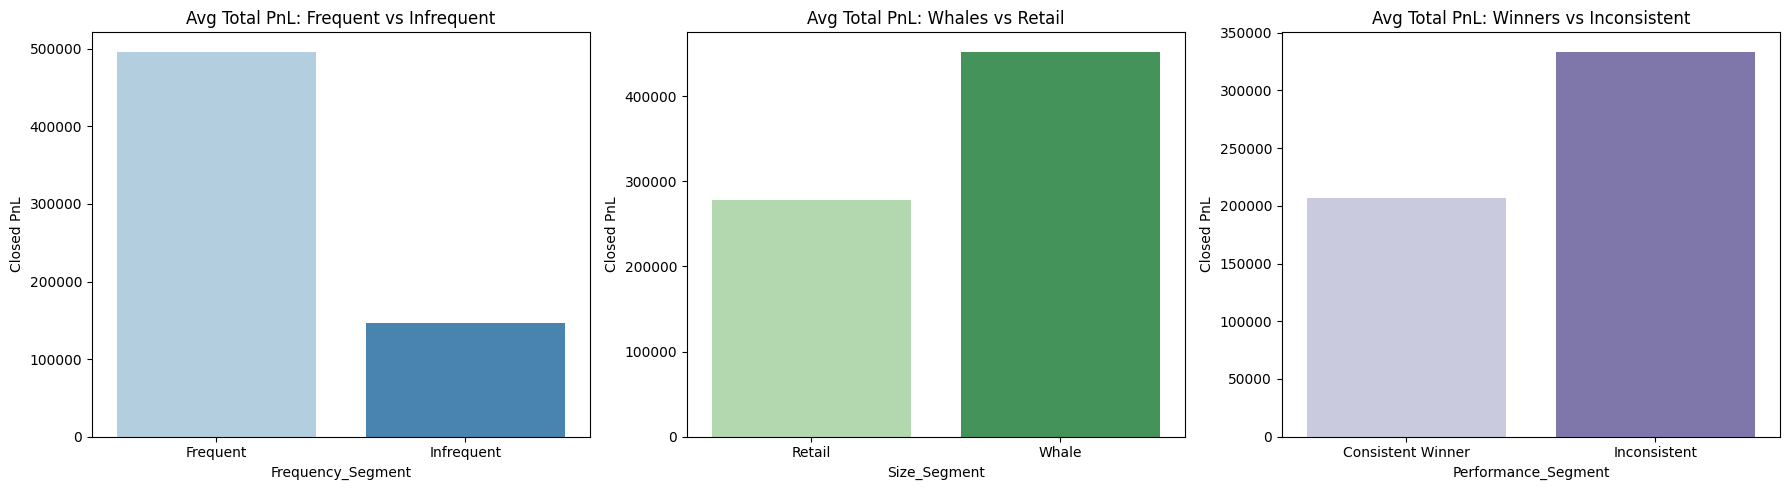

--- INSIGHT 1: Frequency Analysis ---
  Frequency_Segment     Closed PnL
0          Frequent  496527.661215
1        Infrequent  147032.272750

--- INSIGHT 2: Size Analysis (Whale vs Retail) ---
  Size_Segment     Closed PnL
0       Retail  278135.560199
1        Whale  452713.187333

--- INSIGHT 3: Skill Analysis ---
  Performance_Segment     Closed PnL
0   Consistent Winner  206866.631992
1        Inconsistent  333667.553361


In [65]:
# Insight 1: Do Frequent traders make more money?
insight_freq = trader_profiles.groupby('Frequency_Segment')['Closed PnL'].mean().reset_index()

# Insight 2: How do "Whales" perform vs "Retail"?
insight_size = trader_profiles.groupby('Size_Segment')['Closed PnL'].mean().reset_index()

# Insight 3: The "Skill Gap" (Avg PnL of Consistent Winners)
insight_skill = trader_profiles.groupby('Performance_Segment')['Closed PnL'].mean().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Frequency vs PnL
sns.barplot(x='Frequency_Segment', y='Closed PnL', data=insight_freq, ax=axes[0], hue='Frequency_Segment', palette='Blues', legend=False)
axes[0].set_title('Avg Total PnL: Frequent vs Infrequent')

# Plot 2: Whale vs Retail
sns.barplot(x='Size_Segment', y='Closed PnL', data=insight_size, ax=axes[1], hue='Size_Segment', palette='Greens', legend=False)
axes[1].set_title('Avg Total PnL: Whales vs Retail')

# Plot 3: Skill Gap
sns.barplot(x='Performance_Segment', y='Closed PnL', data=insight_skill, ax=axes[2], hue='Performance_Segment', palette='Purples', legend=False)
axes[2].set_title('Avg Total PnL: Winners vs Inconsistent')

plt.tight_layout()
plt.show()

# --- PRINT EVIDENCE TABLES ---
print("--- INSIGHT 1: Frequency Analysis ---")
print(insight_freq)
print("\n--- INSIGHT 2: Size Analysis (Whale vs Retail) ---")
print(insight_size)
print("\n--- INSIGHT 3: Skill Analysis ---")
print(insight_skill)

# Bonus: Predictive Model

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
daily_features = df_merged.groupby(['daily_date', 'Account']).agg({
    'Closed PnL': 'sum',
    'Size USD': 'mean',
    'Trade ID': 'count',
    'is_win': 'mean',
    'classification': 'first'  # Take the sentiment for the day
}).reset_index()

daily_features.rename(columns={
    'Closed PnL': 'Daily_PnL',
    'Size USD': 'Avg_Size',
    'Trade ID': 'Trade_Count',
    'is_win': 'Daily_Win_Rate',
    'classification': 'Sentiment' # Changed 'Classification' to 'classification'
}, inplace=True)

# Encode Sentiment (Fear = -1, Greed = 1, Neutral/Other = 0)
def encode_sentiment(x):
    x = str(x).lower()
    if 'fear' in x: return -1
    if 'greed' in x: return 1
    return 0

daily_features['Sentiment_Score'] = daily_features['Sentiment'].apply(encode_sentiment)

# CREATE TARGET VARIABLE
daily_features.sort_values(by=['Account', 'daily_date'], inplace=True)

# Create 'Next_Day_PnL'
daily_features['Next_Day_PnL'] = daily_features.groupby('Account')['Daily_PnL'].shift(-1)

# Drop the last day (since it has no "tomorrow")
model_df = daily_features.dropna(subset=['Next_Day_PnL']).copy()

# Create the Binary Target: 1 = Profitable Tomorrow, 0 = Loss Tomorrow
model_df['Target_Class'] = (model_df['Next_Day_PnL'] > 0).astype(int)

In [68]:
# TRAIN THE MODEL ---
features = ['Sentiment_Score', 'Avg_Size', 'Trade_Count', 'Daily_Win_Rate', 'Daily_PnL']
X = model_df[features]
y = model_df['Target_Class']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Initialize and Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# --- STEP 4: EVALUATE & VISUALIZE ---
# Predict
y_pred = rf_model.predict(X_test)

# 1. Print Accuracy Metrics
print("--- Model Performance Report ---")
print(classification_report(y_test, y_pred))

--- Model Performance Report ---
              precision    recall  f1-score   support

           0       0.56      0.40      0.46       169
           1       0.70      0.82      0.76       293

    accuracy                           0.66       462
   macro avg       0.63      0.61      0.61       462
weighted avg       0.65      0.66      0.65       462



/tmp/ipython-input-528249423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


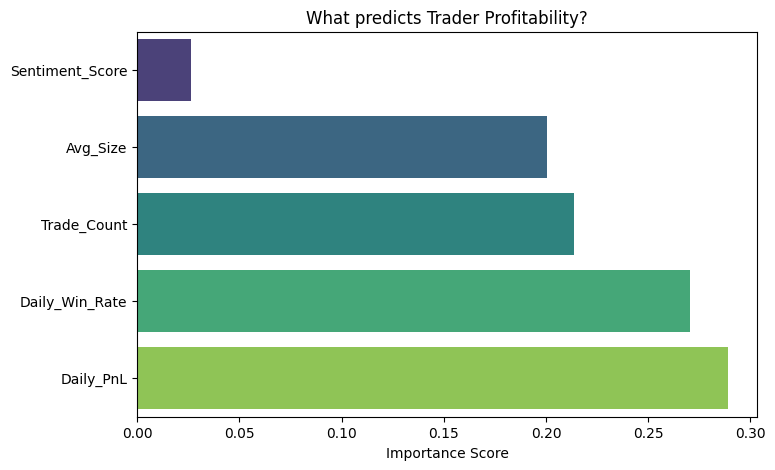

In [70]:
# 2. Feature Importance Plot (The "Why")
importances = rf_model.feature_importances_
feature_names = features

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('What predicts Trader Profitability?')
plt.xlabel('Importance Score')
plt.show()

# Finding Behavioral Archetypes

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [72]:
# PREPARE TRADER FEATURES
# Aggregate data to the Account level
trader_features = df_merged.groupby('Account').agg({
    'Trade ID': 'count',           # Frequency
    'Size USD': 'mean',            # Size (Whale vs Retail)
    'is_win': 'mean',              # Skill (Win Rate)
    'Closed PnL': 'sum',           # Total Profitability
    'Closed PnL': 'std'            # Volatility (Risk Taking) -> Rename later
}).rename(columns={
    'Trade ID': 'Frequency',
    'Size USD': 'Avg_Size',
    'is_win': 'Win_Rate',
    'Closed PnL': 'PnL_Volatility' # Using std dev as risk proxy
})

In [73]:
# Handle missing volatility (for traders with 1 trade)
trader_features['PnL_Volatility'] = trader_features['PnL_Volatility'].fillna(0)

In [74]:
# Normalize Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(trader_features)

In [75]:
# Apply K-MEANS Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
trader_features['Cluster'] = kmeans.fit_predict(features_scaled)
# Calculate the mean of each feature for each cluster to understand "Who they are"
cluster_summary = trader_features.groupby('Cluster').mean()
print("--- TRADER ARCHETYPES (Cluster Averages) ---")
print(cluster_summary)

--- TRADER ARCHETYPES (Cluster Averages) ---
            Frequency      Avg_Size  Win_Rate  PnL_Volatility
Cluster                                                      
0         4227.818182   9292.042994  0.496172      677.149583
1         2089.833333   5018.092864  0.333754     1047.858165
2         3818.000000  16159.576734  0.359612     4692.452329
3        16977.750000   1708.071974  0.384431      334.799582


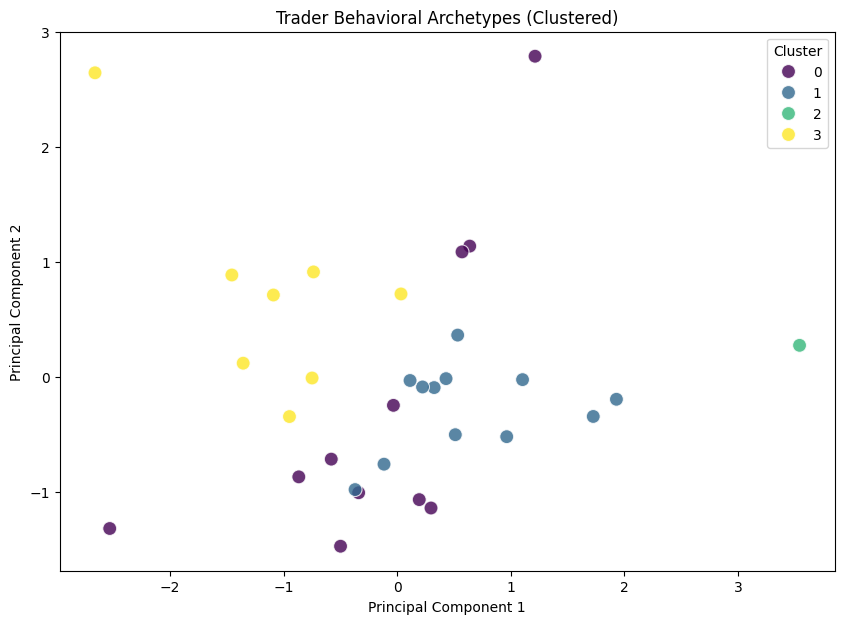

In [76]:
# Visualize
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = trader_features['Cluster'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('Trader Behavioral Archetypes (Clustered)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()